# Cardiovascular Disease Dataset (EDA + Feature Engineering)

##Fetch the Dataset

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")
print("Path to dataset files:", path)


100%|██████████| 742k/742k [00:00<00:00, 80.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sulianova/cardiovascular-disease-dataset/versions/1


In [2]:
# Load CSV
df = pd.read_csv(path + "/cardio_train.csv", sep=";")


print(df.shape)
df.head()


(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

## Data Cleaning

In [4]:
# Drop 'id' and convert age
df.drop(columns='id', inplace=True)
df['age_years'] = (df['age'] / 365).astype(int)

In [5]:
# Check for missing values
print(df.isnull().sum())

# Basic info
print(df.describe())


age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
dtype: int64
                age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   19468.865814      1.349571    164.359229     74.205690    128.817286   
std     2467.251667      0.476838      8.210126     14.395757    154.011419   
min    10798.000000      1.000000     55.000000     10.000000   -150.000000   
25%    17664.000000      1.000000    159.000000     65.000000    120.000000   
50%    19703.000000      1.000000    165.000000     72.000000    120.000000   
75%    21327.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc       

## EDA

### Target Distribution

/tmp/ipython-input-6-3611875266.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cardio', data=df, palette='Set2')


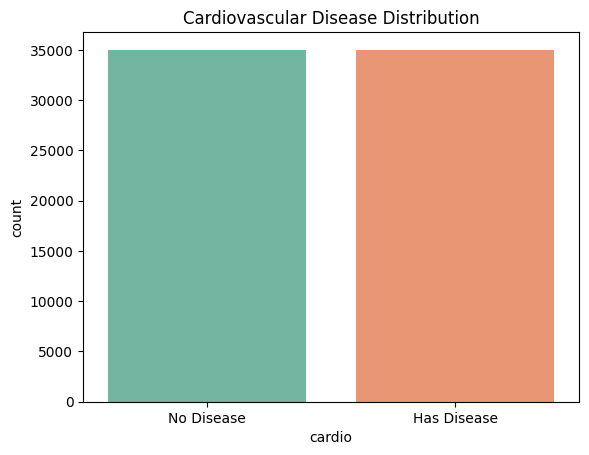

In [6]:
sns.countplot(x='cardio', data=df, palette='Set2')
plt.title("Cardiovascular Disease Distribution")
plt.xticks([0, 1], ['No Disease', 'Has Disease'])
plt.show()


### Gender Distribution by Disease

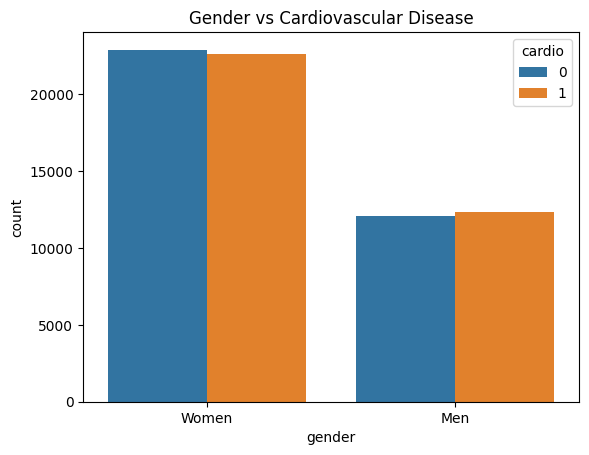

In [7]:
sns.countplot(x='gender', hue='cardio', data=df)
plt.xticks([0,1], ['Women','Men'])
plt.title("Gender vs Cardiovascular Disease")
plt.show()


### Age vs Disease

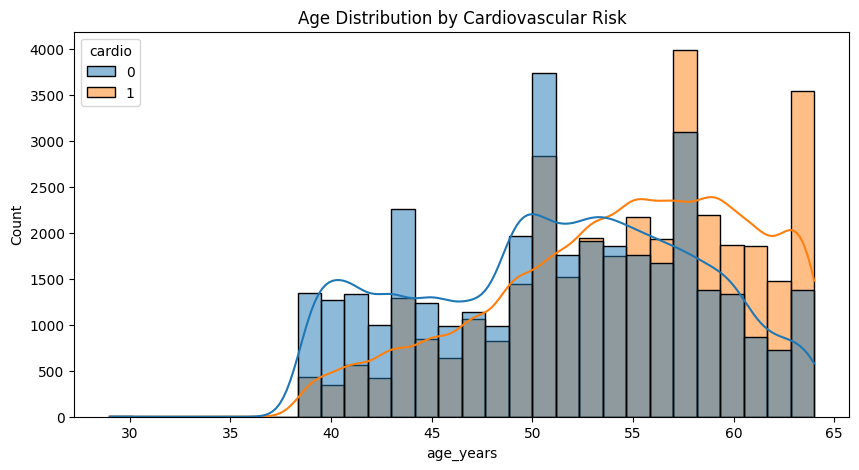

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age_years', hue='cardio', bins=30, kde=True)
plt.title("Age Distribution by Cardiovascular Risk")
plt.show()


### Blood Pressure Patterns

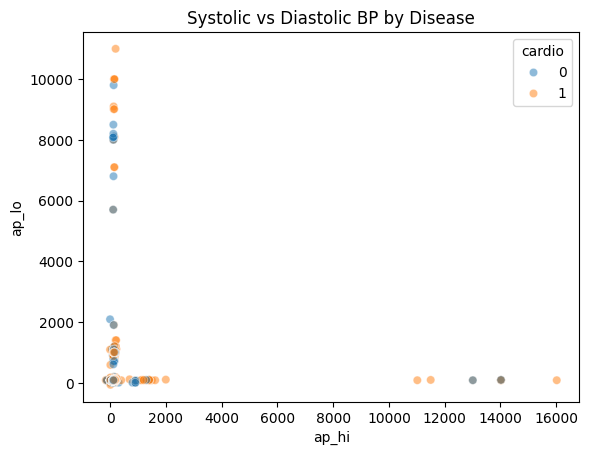

In [9]:
sns.scatterplot(x='ap_hi', y='ap_lo', hue='cardio', data=df, alpha=0.5)
plt.title("Systolic vs Diastolic BP by Disease")
plt.show()


## Feature Engineering

### BMI Calculation

In [10]:
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)


### BMI Category

In [11]:
def bmi_category(bmi):
    if bmi < 18.5: return 'Underweight'
    elif bmi < 25: return 'Normal'
    elif bmi < 30: return 'Overweight'
    else: return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)


### Blood Pressure Risk Category

In [12]:
def bp_category(row):
    if row['ap_hi'] < 120 and row['ap_lo'] < 80: return 'Normal'
    elif 120 <= row['ap_hi'] < 140 or 80 <= row['ap_lo'] < 90: return 'Elevated'
    else: return 'High'

df['bp_category'] = df.apply(bp_category, axis=1)


### Risk Factor Score

In [13]:
df['risk_factors'] = df[['smoke', 'alco', 'active']].sum(axis=1)


## Encode Categorical Variables

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['bmi_cat_encoded'] = le.fit_transform(df['bmi_category'])
df['bp_cat_encoded'] = le.fit_transform(df['bp_category'])


## Final Columns for Modeling

In [15]:
df_model = df[[
    'age_years', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
    'cholesterol', 'gluc', 'smoke', 'alco', 'active',
    'bmi', 'bmi_cat_encoded', 'bp_cat_encoded', 'risk_factors', 'cardio'
]]

df_model.head()


,age_years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,bmi_cat_encoded,bp_cat_encoded,risk_factors,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,21.967120,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,34.927679,1,1,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,23.507805,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,28.710479,2,1,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,23.011177,0,2,0,0


# THANK YOU!